In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_train.csv')
test = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_test.csv')
X_train = df.values[:, 2:].T
Y_train = df.values[:, 1].T
x_test = test.values[:, 1:]
ids = test.values[:, 0]
m, n = df.values.shape

Iteration:  0
0.0776
Iteration:  100
0.18413333333333334
Iteration:  200
0.3011666666666667
Iteration:  300
0.3979666666666667
Iteration:  400
0.467
Iteration:  500
0.5114666666666666
Iteration:  600
0.5425333333333333
Iteration:  700
0.5652666666666667
Iteration:  800
0.5824
Iteration:  900
0.5958
Iteration:  1000
0.6060666666666666
Iteration:  1100
0.6137666666666667
Iteration:  1200
0.6221
Iteration:  1300
0.6302666666666666
Iteration:  1400
0.6354333333333333
Iteration:  1500
0.6408333333333334
Iteration:  1600
0.6468333333333334
Iteration:  1700
0.6522
Iteration:  1800
0.6569333333333334
Iteration:  1900
0.6606666666666666
Iteration:  2000
0.6640333333333334
Iteration:  2100
0.6674
Iteration:  2200
0.6701666666666667
Iteration:  2300
0.6732
Iteration:  2400
0.6764
Iteration:  2500
0.6797
Iteration:  2600
0.6824333333333333
Iteration:  2700
0.6855
Iteration:  2800
0.6878666666666666
Iteration:  2900
0.6900666666666667
Iteration:  3000
0.6924333333333333
Iteration:  3100
0.694766666

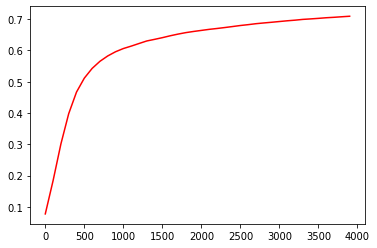

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_train.csv')
test = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_test.csv')
x = df.values[:, 2:]
y = df.values[:, 1]
x_test = test.values[:, 1:]
ids = test.values[:, 0]
m, n = df.values.shape


def sigmoid(z):
  return (1/(1 + np.exp(-z)))

def normalize(X):
    mu = X.mean(0)
    std = X.std(0)
    return (X - mu) / std

def inpar():
  w1 = np.random.rand(128,784) - 0.5
  b1 = np.random.rand(128,1) - 0.5
  w2 = np.random.rand(10,128) - 0.5
  b2 = np.random.rand(10,1) - 0.5
  return w1, b1, w2, b2

def relu(z):
  return np.maximum(0,z)

def softmax(z):
  return np.exp(z)/np.sum(np.exp(z))

def forp(w1, b1, w2, b2, x):
  z1 = w1.dot(x) + b1
  a1 = relu(z1)
  z2 = w2.dot(a1) + b2
  a2 = sigmoid(z2)
  return z1, a1, z2, a2

def onehot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def dRelu(z):
  return z>0

def backprop(Z1, A1, Z2, A2, W1, W2, X, Y):
    onehot_Y = onehot(Y)
    dZ2 = A2 - onehot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * dRelu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def updateparams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


def predict(a):
    return np.argmax(a, 0)

def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = inpar()   
    xaxis = []
    yaxis = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forp(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = updateparams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        
        if i % 100 == 0:
            print("Iteration: ", i)
            xaxis.append(i)
            predictions = predict(A2)
            v = get_accuracy(predictions, Y)
            yaxis.append(v)
            print(v)
    return W1, b1, W2, b2, xaxis, yaxis


x = x/255


x = x.T

y = y.T
W1, b1, W2, b2, xaxis, yaxis = gradient_descent(x, y, 0.001, 4000)


plt.plot(xaxis, yaxis, color = "red")



Iteration:  0
0.09986666666666667
Iteration:  100
0.4666666666666667
Iteration:  200
0.5702333333333334
Iteration:  300
0.6139666666666667
Iteration:  400
0.6397
Iteration:  500
0.6572333333333333
Iteration:  600
0.6737333333333333
Iteration:  700
0.6858
Iteration:  800
0.6976333333333333
Iteration:  900
0.7066
Iteration:  1000
0.7138333333333333
Iteration:  1100
0.7222333333333333
Iteration:  1200
0.7280333333333333
Iteration:  1300
0.7345333333333334
Iteration:  1400
0.7389666666666667
Iteration:  1500
0.7444333333333333
Iteration:  1600
0.7490666666666667
Iteration:  1700
0.7529
Iteration:  1800
0.7565
Iteration:  1900
0.7601333333333333
Iteration:  2000
0.7625666666666666
Iteration:  2100
0.7654666666666666
Iteration:  2200
0.7687
Iteration:  2300
0.7707666666666667
Iteration:  2400
0.7731
Iteration:  2500
0.7755333333333333
Iteration:  2600
0.7777333333333334
Iteration:  2700
0.7799
Iteration:  2800
0.7818666666666667
Iteration:  2900
0.7834666666666666


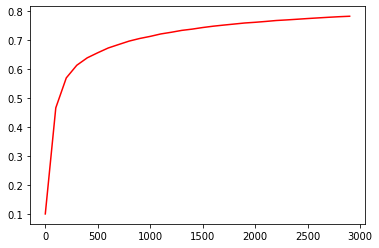

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_train.csv')
test = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_test.csv')
x = df.values[:, 2:]
y = df.values[:, 1]
x_test = test.values[:, 1:]
ids = test.values[:, 0]
m, n = df.values.shape


def sigmoid(z):
  return (1/(1 + np.exp(-z)))

def normalize(X):
    mu = X.mean(0)
    std = X.std(0)
    return (X - mu) / std

def inpar():
  w1 = np.random.rand(128,784) - 0.5
  b1 = np.random.rand(128,1) - 0.5
  w2 = np.random.rand(10,128) - 0.5
  b2 = np.random.rand(10,1) - 0.5
  return w1, b1, w2, b2

def relu(z):
  return np.maximum(0,z)

def softmax(z):
  return np.exp(z)/np.sum(np.exp(z))

def forp(w1, b1, w2, b2, x):
  z1 = w1.dot(x) + b1
  a1 = relu(z1)
  z2 = w2.dot(a1) + b2
  a2 = sigmoid(z2)
  return z1, a1, z2, a2

def onehot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def dRelu(z):
  return z>0

def backprop(Z1, A1, Z2, A2, W1, W2, X, Y):
    onehot_Y = onehot(Y)
    dZ2 = A2 - onehot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * dRelu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def updateparams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


def predict(a):
    return np.argmax(a, 0)

def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = inpar()   
    xaxis = []
    yaxis = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forp(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = updateparams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        
        if i % 100 == 0:
            print("Iteration: ", i)
            xaxis.append(i)
            predictions = predict(A2)
            v = get_accuracy(predictions, Y)
            yaxis.append(v)
            print(v)
    return W1, b1, W2, b2, xaxis, yaxis


x = x/255


x = x.T

y = y.T
W1, b1, W2, b2, xaxis, yaxis = gradient_descent(x, y, 0.005, 3000)


plt.plot(xaxis, yaxis, color = "red")



Iteration:  0
0.11966666666666667
Iteration:  100
0.5748666666666666
Iteration:  200
0.6436
Iteration:  300
0.6738333333333333
Iteration:  400
0.695
Iteration:  500
0.7098
Iteration:  600
0.7232
Iteration:  700
0.7333666666666666
Iteration:  800
0.7425
Iteration:  900
0.7497333333333334
Iteration:  1000
0.7562
Iteration:  1100
0.7615
Iteration:  1200
0.7662333333333333
Iteration:  1300
0.7711
Iteration:  1400
0.7751333333333333
Iteration:  1500
0.7782333333333333
Iteration:  1600
0.7813333333333333
Iteration:  1700
0.7843
Iteration:  1800
0.7873333333333333
Iteration:  1900
0.7895333333333333
Iteration:  2000
0.7912
Iteration:  2100
0.7931666666666667
Iteration:  2200
0.7951666666666667
Iteration:  2300
0.7970333333333334
Iteration:  2400
0.7986333333333333
Iteration:  2500
0.8001
Iteration:  2600
0.8013
Iteration:  2700
0.8029666666666667
Iteration:  2800
0.8050333333333334
Iteration:  2900
0.8061


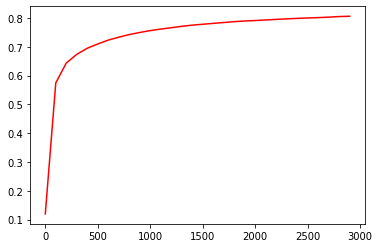

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_train.csv')
test = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_test.csv')
x = df.values[:, 2:]
y = df.values[:, 1]
x_test = test.values[:, 1:]
ids = test.values[:, 0]
m, n = df.values.shape


def sigmoid(z):
  return (1/(1 + np.exp(-z)))

def normalize(X):
    mu = X.mean(0)
    std = X.std(0)
    return (X - mu) / std

def inpar():
  w1 = np.random.rand(128,784) - 0.5
  b1 = np.random.rand(128,1) - 0.5
  w2 = np.random.rand(10,128) - 0.5
  b2 = np.random.rand(10,1) - 0.5
  return w1, b1, w2, b2

def relu(z):
  return np.maximum(0,z)

def softmax(z):
  return np.exp(z)/np.sum(np.exp(z))

def forp(w1, b1, w2, b2, x):
  z1 = w1.dot(x) + b1
  a1 = relu(z1)
  z2 = w2.dot(a1) + b2
  a2 = sigmoid(z2)
  return z1, a1, z2, a2

def onehot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def dRelu(z):
  return z>0

def backprop(Z1, A1, Z2, A2, W1, W2, X, Y):
    onehot_Y = onehot(Y)
    dZ2 = A2 - onehot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * dRelu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def updateparams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


def predict(a):
    return np.argmax(a, 0)

def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = inpar()   
    xaxis = []
    yaxis = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forp(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = updateparams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        
        if i % 100 == 0:
            print("Iteration: ", i)
            xaxis.append(i)
            predictions = predict(A2)
            v = get_accuracy(predictions, Y)
            yaxis.append(v)
            print(v)
    return W1, b1, W2, b2, xaxis, yaxis


x = x/255


x = x.T

y = y.T
W1, b1, W2, b2, xaxis, yaxis = gradient_descent(x, y, 0.01, 3000)


plt.plot(xaxis, yaxis, color = "red")



Iteration:  0
0.0395
Iteration:  100
0.6953
Iteration:  200
0.7510333333333333
Iteration:  300
0.7747
Iteration:  400
0.7884
Iteration:  500
0.7989666666666667
Iteration:  600
0.8069666666666667
Iteration:  700
0.8128333333333333
Iteration:  800
0.8172666666666667
Iteration:  900
0.8212333333333334


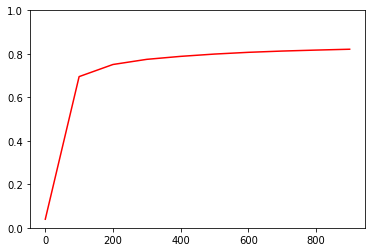

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_train.csv')
test = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_test.csv')
# train = df.sample(frac=0.7, random_state = 42)
# valid = df.drop(train.index)
# df = train
# valid_y = valid["label"].values
# valid = valid.values
# valid_x = valid[:, 2:]
x = df.values[:, 2:]
y = df.values[:, 1]
x_test = (test.values[:, 1:]/255).T
ids = test.values[:, 0]
m, n = df.values.shape


def sigmoid(z):
  return (1/(1 + np.exp(-z)))

def normalize(X):
    mu = X.mean(0)
    std = X.std(0)
    return (X - mu) / std

def inpar():
  w1 = np.random.rand(128,784) - 0.5
  b1 = np.random.rand(128,1) - 0.5
  w2 = np.random.rand(10,128) - 0.5
  b2 = np.random.rand(10,1) - 0.5
  return w1, b1, w2, b2

def relu(z):
  return np.maximum(0,z)

def softmax(z):
  return np.exp(z)/np.sum(np.exp(z))

def forp(w1, b1, w2, b2, x):
  z1 = w1.dot(x) + b1
  a1 = relu(z1)
  z2 = w2.dot(a1) + b2
  a2 = sigmoid(z2)
  return z1, a1, z2, a2

def onehot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def dRelu(z):
  return z>0

def backprop(Z1, A1, Z2, A2, W1, W2, X, Y):
    onehot_Y = onehot(Y)
    dZ2 = A2 - onehot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * dRelu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def updateparams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


def predict(a):
    return np.argmax(a, 0)

def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = inpar()   
    xaxis = []
    yaxis = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forp(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = updateparams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        
        if i % 100 == 0:
            print("Iteration: ", i)
            xaxis.append(i)
            predictions = predict(A2)
            v = get_accuracy(predictions, Y)
            yaxis.append(v)
            print(v)
    return W1, b1, W2, b2, xaxis, yaxis


x = x/255


x = x.T

y = y.T
W1, b1, W2, b2, xaxis, yaxis = gradient_descent(x, y, 0.05, 1000)

plt.ylim(0, 1)
plt.plot(xaxis, yaxis, color = "red")




In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forp(W1, b1, W2, b2, X)
    predictions = predict(A2)
    return predictions

'''
def test_prediction(index, W1, b1, W2, b2):
    current_image = x_test[:, index, None]
    prediction = make_predictions(x_test[:, index, None], W1, b1, W2, b2)
    label = valid_y[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
'''

'\ndef test_prediction(index, W1, b1, W2, b2):\n    current_image = x_test[:, index, None]\n    prediction = make_predictions(x_test[:, index, None], W1, b1, W2, b2)\n    label = valid_y[index]\n    print("Prediction: ", prediction)\n    print("Label: ", label)\n    \n    current_image = current_image.reshape((28, 28)) * 255\n    plt.gray()\n    plt.imshow(current_image, interpolation=\'nearest\')\n    plt.show()\n'

In [ ]:
res = make_predictions(x_test, W1, b1, W2, b2)

In [ ]:
# valid_x = (valid_x/255).T
# valid_y = valid_y.T
# get_accuracy(make_predictions(valid_x, W1, b1, W2, b2), valid_y)

In [ ]:
ids1 = ids.T
res1 = res.T

outputDict = {
    'Ids': list(ids1),
    'Result': list(res1)
}

outputDictdf = pd.DataFrame(outputDict)

outputDictdf.to_csv("neuralNetworkOutputPandas.csv")

In [ ]:
list(res1)

[0,
 1,
 2,
 6,
 1,
 8,
 8,
 6,
 5,
 0,
 3,
 4,
 4,
 6,
 8,
 5,
 6,
 3,
 6,
 4,
 4,
 4,
 2,
 1,
 5,
 9,
 8,
 4,
 4,
 1,
 7,
 7,
 7,
 8,
 1,
 0,
 9,
 6,
 0,
 1,
 2,
 0,
 4,
 2,
 2,
 0,
 3,
 3,
 2,
 3,
 2,
 4,
 9,
 3,
 0,
 9,
 9,
 4,
 0,
 3,
 4,
 5,
 4,
 6,
 1,
 1,
 0,
 9,
 5,
 2,
 7,
 3,
 4,
 2,
 5,
 7,
 1,
 2,
 1,
 3,
 9,
 8,
 1,
 2,
 4,
 8,
 9,
 4,
 1,
 6,
 3,
 6,
 2,
 2,
 6,
 3,
 4,
 7,
 7,
 3,
 9,
 3,
 9,
 8,
 8,
 2,
 3,
 6,
 2,
 7,
 5,
 5,
 3,
 4,
 7,
 5,
 6,
 2,
 7,
 1,
 0,
 5,
 4,
 4,
 7,
 0,
 8,
 5,
 0,
 3,
 1,
 7,
 9,
 4,
 9,
 6,
 4,
 2,
 0,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 0,
 1,
 3,
 4,
 3,
 3,
 1,
 9,
 3,
 3,
 3,
 9,
 5,
 6,
 7,
 7,
 3,
 2,
 4,
 0,
 2,
 7,
 2,
 6,
 8,
 9,
 0,
 4,
 4,
 6,
 5,
 7,
 9,
 9,
 1,
 3,
 9,
 1,
 7,
 5,
 6,
 0,
 7,
 4,
 7,
 1,
 6,
 0,
 0,
 6,
 6,
 0,
 9,
 0,
 6,
 2,
 5,
 5,
 8,
 6,
 2,
 1,
 9,
 3,
 4,
 7,
 1,
 9,
 5,
 9,
 8,
 2,
 8,
 5,
 9,
 9,
 3,
 2,
 4,
 5,
 9,
 8,
 1,
 7,
 5,
 6,
 2,
 9,
 7,
 4,
 0,
 9,
 2,
 1,
 5,
 7,
 7,
 0,
 2,
 3,
 5,
 3,
 3,


In [ ]:
test = df.sample(frac=0.2, random_state = 42).values
xtest = test[:, 2:]
ytest = test[:, 1]
res = make_predictions(xtest, W1, b1, W2, b2)
print(get_accuracy(res, ytest))

In [ ]:
valid_x.shape

(784, 10000)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/neuralNetworkOutputPandas.csv')
d = pd.read_csv('/content/drive/MyDrive/cyberlab/classification_test.csv')

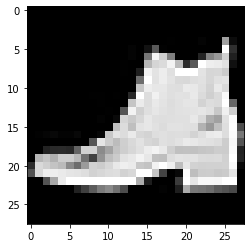

In [ ]:
plt.imshow(d.to_numpy()[651, 1:].reshape(28, 28), cmap='gray')